<a href="https://colab.research.google.com/github/NguyenQuangHuy2001/AI/blob/main/Robot_3DOF__ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tạo dữ liệu 

In [6]:
from math import cos, sin, pi
from pandas import DataFrame
import numpy as np
theta1 = []
theta2 = []
theta3 = []
px = []
py = []
Si = []
l1 = 50
l2 = 40
l3 = 20
for t1 in range (0,90):
    for t2 in range (0,180):
        for t3 in range (0,180):
            theta1.append(t1)
            theta2.append(t2)
            theta3.append(t3)
            px.append(round(l1*cos(t1*pi/180) + l2*cos((t1+t2)*pi/180) + l3*cos((t1+t2+t3)*pi/180),2))
            py.append(round(l1*sin(t1*pi/180) + l2*sin((t1+t2)*pi/180) + l3*sin((t1+t2+t3)*pi/180),2))
            Si.append(t1+t2+t3)
df = DataFrame(np.c_[theta1,theta2,theta3,px,py,Si],columns = ['theta1','theta2','theta3','px','py','Si'])
export_csv = df.to_csv (r'Robot_3DOF_ANN.csv', index = None, header=True)

Import thư viện

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Xử lý dữ liệu

In [8]:
url = 'Robot_3DOF_ANN.csv'
data = pd.read_csv(url)
#print(data)
data_x = data.drop(data.columns[:3], axis = 1)
#print(data_x)
X = data_x.values.tolist()
data_y = data.drop(data.columns[3:], axis = 1)
#print(data_y)
Y = data_y.values.tolist()
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_train = X_train.data.tolist()

X_test = standard_scaler.fit_transform(X_test)
X_test = X_test.data.tolist()

X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

Tạo model 

In [9]:

model = Sequential()
model.add(Dense(64, activation='relu',kernel_initializer='normal', input_shape = (3,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2,435
Trainable params: 2,435
Non-trainable params: 0
_________________________________________________________________


Trainning

In [10]:

model.compile(loss='mse', optimizer =RMSprop(), metrics=['mean_absolute_error'])
history = model.fit(X_train, Y_train, batch_size = 128, epochs = 64,verbose = 1, validation_split=0.2)
#Lưu model
model.save('Robot_3DOF_ANN.h5')

Epoch 1/64
14580/14580 [==============================] - 31s 2ms/step - loss: 185.9259 - mean_absolute_error: 5.7846 - val_loss: 15.0278 - val_mean_absolute_error: 2.5944
Epoch 2/64
14580/14580 [==============================] - 29s 2ms/step - loss: 12.2933 - mean_absolute_error: 2.3317 - val_loss: 9.9949 - val_mean_absolute_error: 2.0850
Epoch 3/64
14580/14580 [==============================] - 29s 2ms/step - loss: 10.0312 - mean_absolute_error: 2.1312 - val_loss: 8.7859 - val_mean_absolute_error: 1.9559
Epoch 4/64
14580/14580 [==============================] - 29s 2ms/step - loss: 9.1002 - mean_absolute_error: 2.0470 - val_loss: 8.6453 - val_mean_absolute_error: 1.9770
Epoch 5/64
14580/14580 [==============================] - 29s 2ms/step - loss: 8.5520 - mean_absolute_error: 1.9993 - val_loss: 8.9763 - val_mean_absolute_error: 2.0812
Epoch 6/64
14580/14580 [==============================] - 29s 2ms/step - loss: 8.1342 - mean_absolute_error: 1.9559 - val_loss: 7.5317 - val_mean_abso

Đánh giá - vẽ đồ thị

Sai số: 2.412658214569092
mean_absolute_error 1.0288975238800049


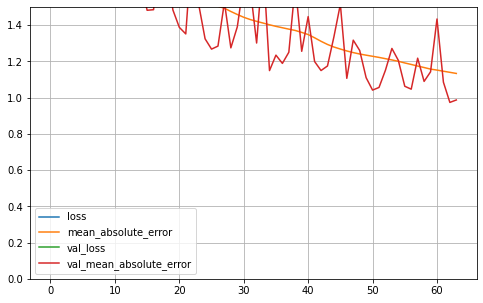

In [12]:
#Danh gia
score = model.evaluate(X_test, Y_test, verbose=0)
print('Sai số:', score[0])
print('mean_absolute_error', score[1])
#Do thi
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1.5)
plt.show()

Dự đoán

In [13]:
score = model.evaluate(X_test,Y_test,verbose=0)
print ('loss = ',score[0])
print ('abs error = ',score[1])

Y_predict = model.predict(X_test)
cal = pd.DataFrame(np.c_[Y_test,Y_predict],columns = ['theta1','theta2','theta3','t1 predict','t2 predict','t3 predict'])
cal

loss =  2.412658214569092
abs error =  1.0288975238800049


,theta1,theta2,theta3,t1 predict,t2 predict,t3 predict
0,9.0,63.0,21.0,9.203407,62.340214,20.532223
1,33.0,145.0,93.0,32.534893,144.651215,94.021385
2,63.0,32.0,91.0,64.378372,30.188015,91.480553
3,45.0,144.0,60.0,45.982441,144.356232,58.974346
4,72.0,43.0,119.0,73.818146,41.045898,119.214851
...,...,...,...,...,...,...
583195,30.0,162.0,57.0,30.176241,162.079803,57.353790
583196,73.0,173.0,79.0,74.330498,172.152435,78.303932
583197,1.0,11.0,31.0,3.573548,5.726163,32.948833
583198,17.0,2.0,179.0,16.018661,3.996179,177.188400
